<h1>🧠 Mental Heath Evaluation Model</h1>

<br>Version: 1.0.0
<br>Author: Raghav Singh
<br>Natural Language Processing
<br>Supervised Learning Algorithms

<br>
Mental health evaluation is a critical aspect of healthcare, aiming to assess an individual's psychological well-being, diagnose disorders, and determine appropriate treatment plans. Machine learning (ML) and natural language processing (NLP) technologies have shown immense promise in revolutionizing the field of mental health evaluation by automating and enhancing the assessment process.

In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1>🤔 Understanding the dataset</h1>

In [3]:
df = pd.read_excel('/kaggle/input/students-anxiety-and-depression-dataset/dataset.xlsx')

In [4]:
df.shape

(6982, 2)

In [5]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [6]:
df.tail()

,text,label
6977,I can't forget you #SpiritHadrian,0.0
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0
6979,Dai5y! <3,0.0
6980,tired of clowns but still hopefully tonight if...,0.0
6981,MW SUBI WN LA VACA,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6972 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [8]:
df.isnull().sum()

text     10
label     2
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.shape

(6970, 2)

In [11]:
df = df.sample(frac = 1)

<h1>🔧 Implementing Utilities(Required Later)</h1>

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [16]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [17]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [18]:
df['cleaned'] = df["text"].apply(text_cleaner)


/tmp/ipykernel_28/57854106.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


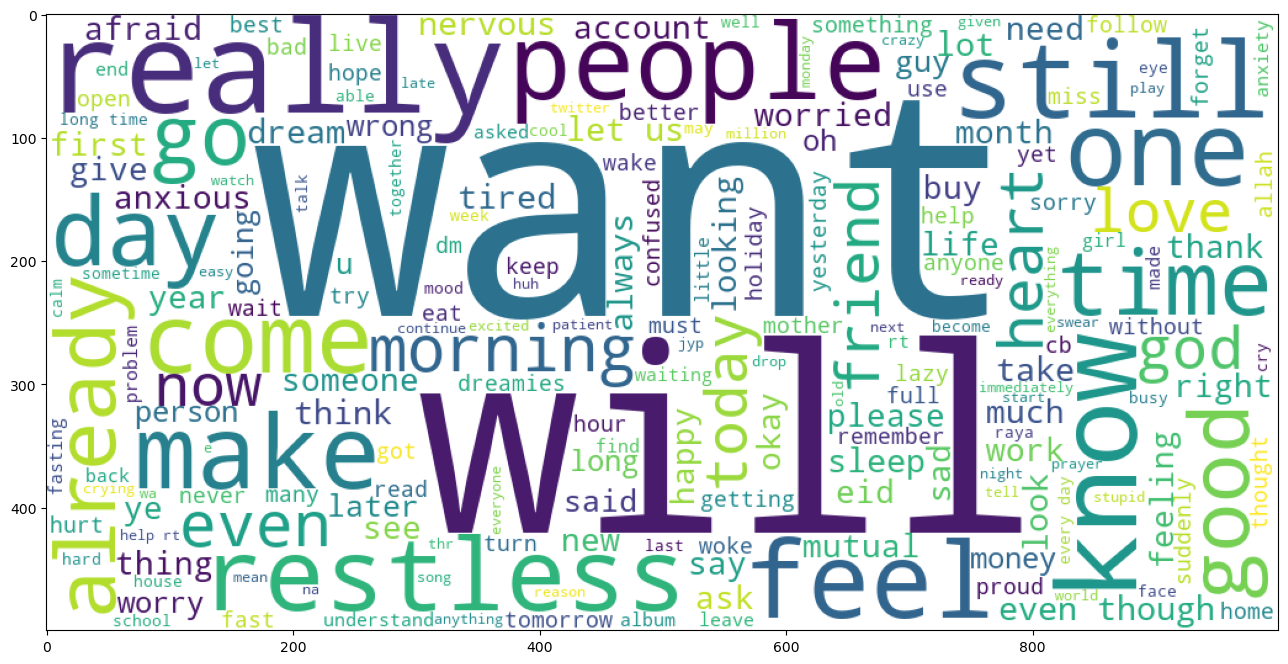

In [19]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [20]:
df.tail()

,text,label,cleaned
2700,I forgot what a happy ending is :((,0.0,i forgot what a happy ending is
243,I'm even worried about myself :((,1.0,i am even worried about myself
6883,"Mommy sad mom :""(",0.0,mommy sad mom
707,"Anxious about the future, will it be gold or j...",1.0,anxious about the future will it be gold or j...
944,Others on vacation I simulate,0.0,others on vacation i simulate


<h1>🏋️‍♀️ Training the model</h1>
At this step we will use different models and check the accuracy of each model.

In [21]:
X = df.cleaned
y = df.label

In [22]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [23]:
X_cv =vect.fit_transform(X).toarray()

In [24]:
X_cv.shape

(6970, 20000)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<h3>performance_eval</h3>
This function evaluates the performance of a model

In [27]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
    return accuracy

In [28]:
best_model = {}

<h3> Logistic Regression Model </h3>
Logistic Regression is a linear classification algorithm used for binary and multiclass classification problems. Despite its name, it's used for classification, not regression. It models the probability of a certain class using the logistic function, which ensures that the output is between 0 and 1. It works well when the relationship between the features and the target is approximately linear.

Accuracy : 0.9849354375896701

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1248
         1.0       0.96      0.89      0.93       146

    accuracy                           0.98      1394
   macro avg       0.98      0.94      0.96      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


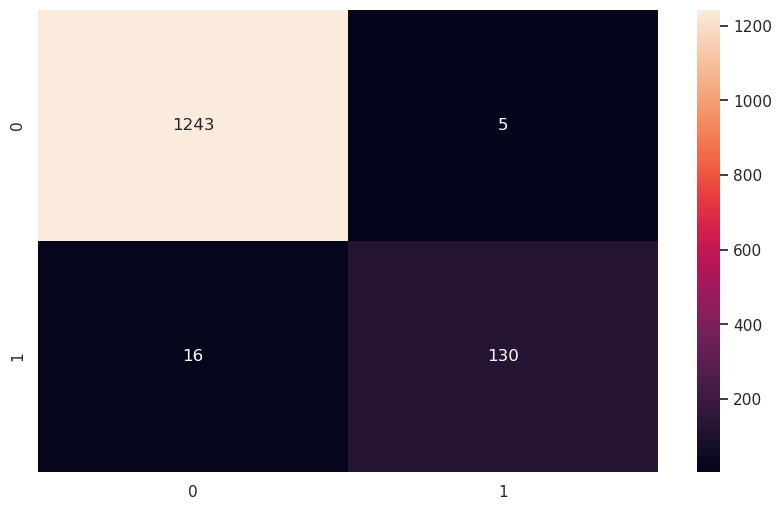

In [29]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
best_model["LogReg"] = performance_eval(clf_lr,X_test)

<h3> Multinomial Naive Bayes Model </h3>
Multinomial Naive Bayes is a probabilistic algorithm based on Bayes' theorem with an assumption of independence between features. It's commonly used for text classification tasks where features represent the frequency of words. Despite its simplicity and the independence assumption, it can perform well for certain types of text data.

Accuracy : 0.9332855093256814

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1248
         1.0       0.64      0.82      0.72       146

    accuracy                           0.93      1394
   macro avg       0.81      0.88      0.84      1394
weighted avg       0.94      0.93      0.94      1394

   ------------ Confusion Matrix -------------- 


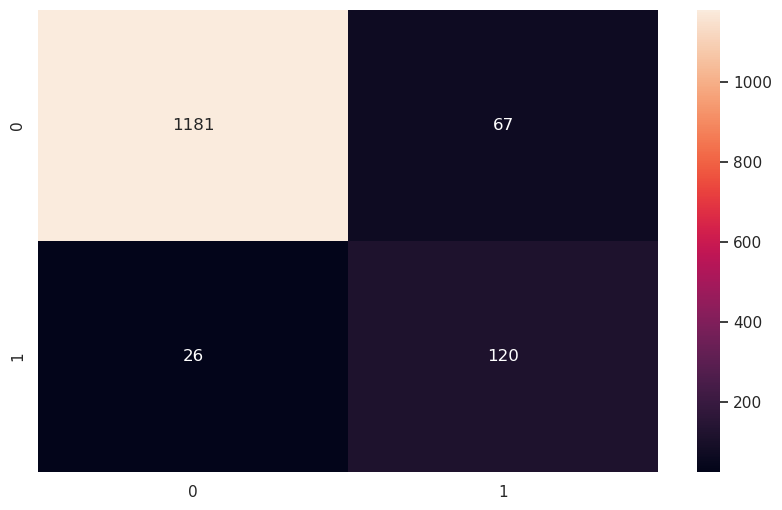

In [30]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
best_model["NB"] = performance_eval(clf_nb,X_test)

<h3> Decision Tree Model </h3>
Decision Trees are hierarchical models that partition the feature space into regions based on feature values. Each partition or node represents a decision based on a feature. It's a non-linear model and is capable of capturing complex relationships in the data. However, they can easily overfit the data if not pruned or regularized.

Accuracy : 0.9791965566714491

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1248
         1.0       0.88      0.92      0.90       146

    accuracy                           0.98      1394
   macro avg       0.94      0.96      0.95      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


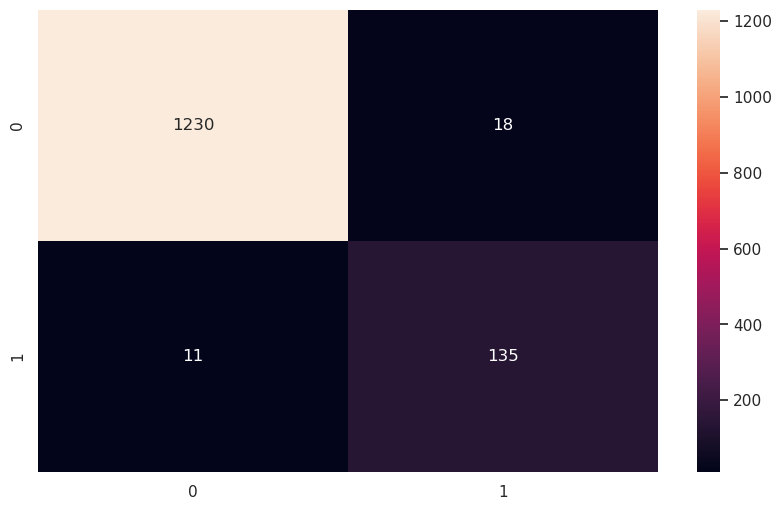

In [31]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
best_model["DT"] = performance_eval(clf_dt,X_test)

<h3> Support Vector Classifier Model </h3>
Support Vector Classifier is a binary classification algorithm that aims to find a hyperplane that best separates the classes while maximizing the margin between them. It's particularly useful when dealing with non-linearly separable data by using kernel functions to map the data into higher-dimensional spaces.

Accuracy : 0.9540889526542324

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1248
         1.0       0.96      0.59      0.73       146

    accuracy                           0.95      1394
   macro avg       0.95      0.79      0.85      1394
weighted avg       0.95      0.95      0.95      1394

   ------------ Confusion Matrix -------------- 


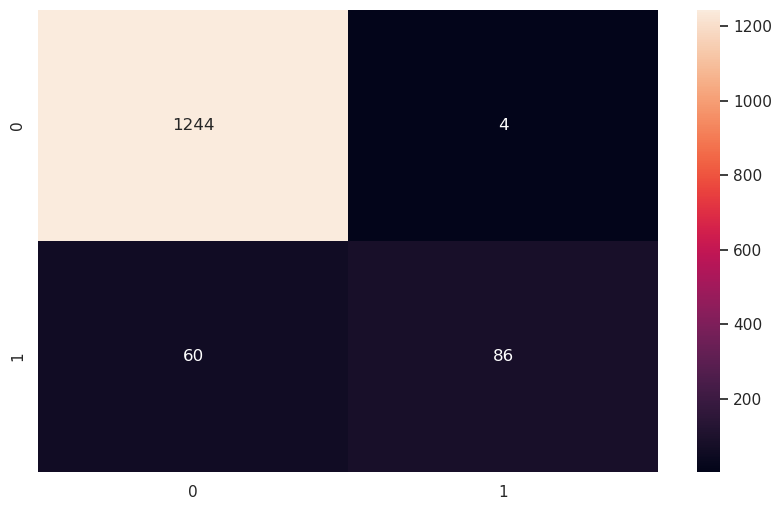

In [32]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
best_model["SVC"] = performance_eval(clf_svm,X_test)

<h3> KNN Model </h3>
K-Nearest Neighbors is a simple instance-based learning algorithm for classification and regression. Given a new data point, it finds the k nearest data points in the training set and assigns the majority class among those points to the new point. It's sensitive to the choice of k and the distance metric used.

Accuracy : 0.9146341463414634

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1248
         1.0       0.91      0.21      0.34       146

    accuracy                           0.91      1394
   macro avg       0.91      0.60      0.64      1394
weighted avg       0.91      0.91      0.89      1394

   ------------ Confusion Matrix -------------- 


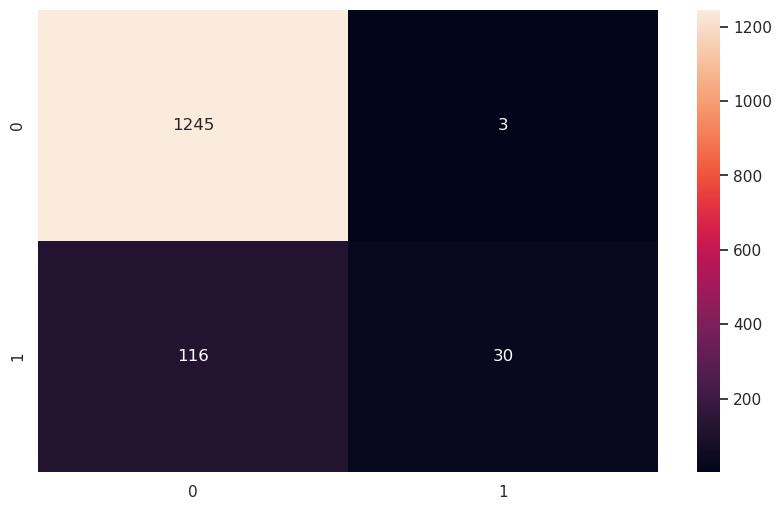

In [33]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
best_model["KNN"] = performance_eval(clf_knn,X_test)

<h3> AdaBoost Classifier Model </h3>
AdaBoost is an ensemble learning technique that combines multiple weak learners (often decision trees) to create a strong classifier. Each weak learner is trained sequentially, with misclassified samples being given more weight in subsequent iterations. It focuses on samples that are difficult to classify, effectively improving the model's overall performance.

Accuracy : 0.9885222381635581

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1248
         1.0       0.96      0.93      0.94       146

    accuracy                           0.99      1394
   macro avg       0.97      0.96      0.97      1394
weighted avg       0.99      0.99      0.99      1394

   ------------ Confusion Matrix -------------- 


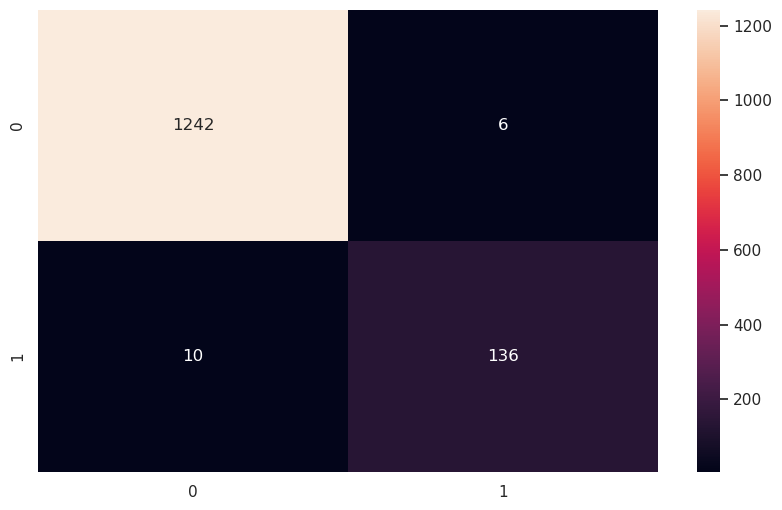

In [34]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
best_model["AdaBoost"] = performance_eval(clf_adb,X_test)

<h3> Random Forest Classifier Model </h3>
Random Forest is a powerful ensemble learning method used for classification and regression tasks. It's an extension of the decision tree algorithm that addresses some of its limitations, such as overfitting and sensitivity to small changes in the data.

Accuracy : 0.9827833572453372

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.96      0.87      0.91       146

    accuracy                           0.98      1394
   macro avg       0.97      0.93      0.95      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


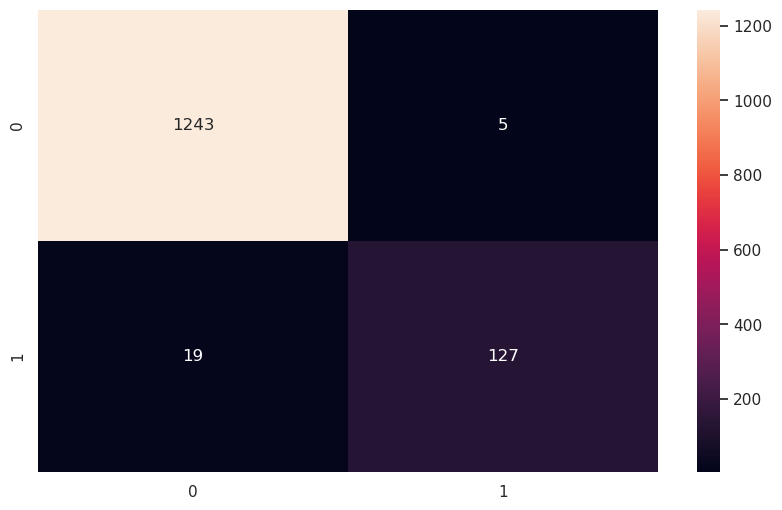

In [35]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
best_model["RF"] = performance_eval(clf_rf,X_test)

<h3> Tensorflow Model </h3>
TensorFlow is an open-source machine learning framework developed by Google. It provides a powerful set of tools for building, training, and deploying various machine learning models, including neural networks. Neural networks are a fundamental component of deep learning and have been instrumental in achieving state-of-the-art performance in various tasks like image recognition, natural language processing, and more.

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Build the model
model = Sequential()
# Shape(None, 20000)
model.add(Dense(64, activation='relu', input_shape=(20000,)))
model.add(Dense(128, activation='relu'))  # Additional layer
model.add(Dense(128, activation='relu'))  # Additional layer
model.add(Dense(64, activation='relu'))  # Additional layer
model.add(Dense(22, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callback
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99 and logs.get('val_accuracy') >= 0.99:
            self.model.stop_training = True

# Create an instance of the callback
callback = AccuracyCallback()

# Train the model with the encoded target labels and the callback
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")
best_model["TF"] = test_acc

Epoch 1/20
175/175 [==============================] - 7s 10ms/step - loss: 0.5753 - accuracy: 0.9128 - val_loss: 0.1012 - val_accuracy: 0.9656
Epoch 2/20
175/175 [==============================] - 1s 7ms/step - loss: 0.0342 - accuracy: 0.9905 - val_loss: 0.1053 - val_accuracy: 0.9713
Epoch 3/20
175/175 [==============================] - 1s 7ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.1047 - val_accuracy: 0.9778
Epoch 4/20
175/175 [==============================] - 1s 6ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.1194 - val_accuracy: 0.9763
Epoch 5/20
175/175 [==============================] - 1s 6ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.1094 - val_accuracy: 0.9749
Epoch 6/20
175/175 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.2085 - val_accuracy: 0.9706
Epoch 7/20
175/175 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.1359 - val_accuracy: 0.9706
Epoch

<h3> 🏅 Ranking the Models </h3>

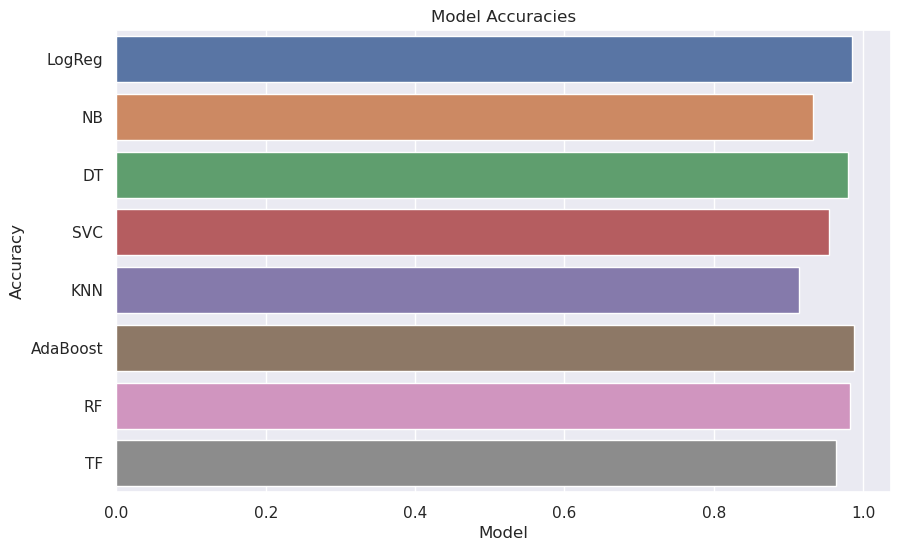

In [37]:
# Extract model names and accuracies from the best_model dictionary
accuracies = list(best_model.values())
model_names = list(best_model.keys())

# Create a bar plot using seaborn
sns.barplot(x=accuracies, y=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

Accuracy : 0.9827833572453372

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.98      0.86      0.91       146

    accuracy                           0.98      1394
   macro avg       0.98      0.93      0.95      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


0.9827833572453372

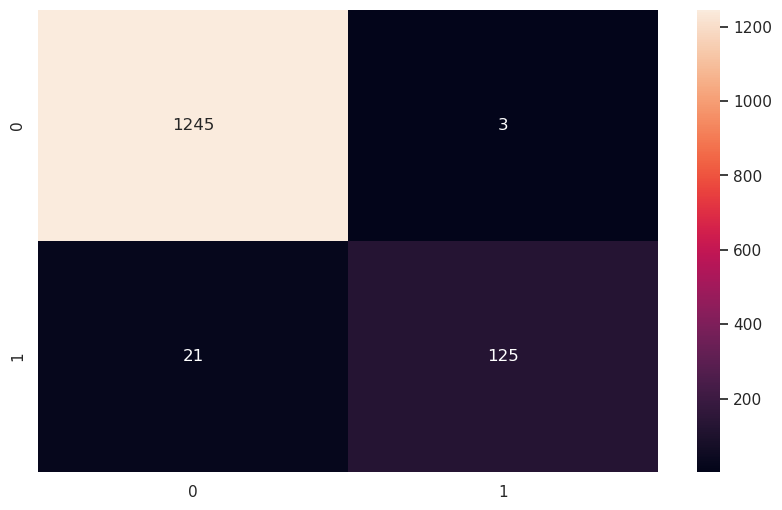

In [38]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

<h3> 💽 Saving the best model </h3>

In [39]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

In [40]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))

<h3> ⌨️ User Input </h3>

In [41]:
text = "Worried about the upcoming exams"

In [46]:
clean_text = text_cleaner(text)
clean_text

'worried about the upcoming exams'

In [47]:
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [48]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression
